<a href="https://colab.research.google.com/github/BinXBioLab/Data_Science_Capstone_Fall_2022/blob/main/Template_25Gb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#0. Mount my drive
from google.colab import drive
drive.mount('/content/drive')
!mkdir /content/MyDrive
!mount --bind /content/drive/My\ Drive /content/MyDrive
# the magic % will help with the cd command :)
%cd /content


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/content/MyDrive’: File exists
/content


In [ ]:
%cd /content/drive/MyDrive/bulkRNAseq/FACS_neurons_062421_090821/FACS_2021/results




/content/drive/MyDrive/bulkRNAseq/FACS_neurons_062421_090821/FACS_2021/results


In [ ]:
!head /content/drive/MyDrive/bulkRNAseq/FACS_neurons_062421_090821/FACS_2021/results/AllreadsCount.csv

,JZ001_S75_L002_,JZ003_S76_L002_,JZ004_S77_L002_,JZ005_S78_L002_,JZ006_S79_L002_,JZ007_S80_L002_,JZ008_S81_L002_,JZ009_S82_L002_,JZ010_S83_L002_,JZ011_S84_L002_,JZ012_S85_L002_,JZ013_S86_L002_,JZ014_S87_L002_,JZ015_S88_L002_,JZ016_S89_L002_,JZ017_S90_L002_,JZ018_S91_L002_,JZ002_S92_L002_
ENSG00000223972,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000227232,27,15,10,30,2,104,27,7,2,35,24,41,67,43,8,10,38,77
ENSG00000278267,3,1,12,8,2,17,2,1,1,7,13,15,18,10,1,6,14,23
ENSG00000243485,2,3,1,3,0,3,0,0,0,1,1,2,7,4,5,1,0,9
ENSG00000284332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000237613,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000268020,0,0,0,0,0,0,0,0,0,0,0,1,4,1,0,0,0,0
ENSG00000240361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
ENSG00000186092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## #3. Setup R Python Interface ENV to run DESeq2

In [ ]:
# set the path to import the local installed packages
import sys
sys.path.append('/content/MyDrive/py_libs/')

In [ ]:
# Load the common libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys


In [ ]:
%cd /content/MyDrive/bulkRNAseq/FACS_neurons_062421_090821/FACS_2021/results

/content/MyDrive/bulkRNAseq/FACS_neurons_062421_090821/FACS_2021/results


In [ ]:
!ls JZ*.bam.bai > phenotype.txt

In [ ]:
!pip install anndata2ri 

     |████████████████████████████████| 127 kB 7.5 MB/s 


In [ ]:
#!pip install rpy2 "/content/MyDrive/py_libs"

ERROR: Invalid requirement: '/content/MyDrive/py_libs'
Hint: It looks like a path. File '/content/MyDrive/py_libs' does not exist.


In [ ]:
import rpy2.rinterface_lib.callbacks
import logging
from rpy2.robjects import pandas2ri
import anndata2ri

# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.WARNING)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

# **Running here**

In [ ]:
%%R
# add my drive libraries to the default libPaths 
.libPaths( c( "/content/MyDrive/R_libs/", .libPaths() ) )
.libPaths();
 

[1] "/content/MyDrive/R_libs"       "/usr/local/lib/R/site-library"
[3] "/usr/lib/R/site-library"       "/usr/lib/R/library"           


In [ ]:
%%R
BiocManager::install(version = "3.13")
install.packages("BiocManager", lib="/content/MyDrive/R_libs/")
BiocManager::version()

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com




Upgrade 54 packages to Bioconductor version '3.13'? [y/n]: y


R[write to console]: Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

R[write to console]: Installing package(s) 'BiocVersion'

R[write to console]: trying URL 'https://bioconductor.org/packages/3.13/bioc/src/contrib/BiocVersion_3.13.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 985 bytes

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

[1] ‘3.13’


In [ ]:
!R --version

R version 4.1.1 (2021-08-10) -- "Kick Things"
Copyright (C) 2021 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under the terms of the
GNU General Public License versions 2 or 3.
For more information about these matters see
https://www.gnu.org/licenses/.



In [ ]:
%%R
# it takes 9mins
BiocManager::install("DESeq2", lib="/content/MyDrive/R_libs/", ask=FALSE)


R[write to console]: Error: Bioconductor version '3.11' requires R version '4.0'; use
  `BiocManager::install(version = '3.13')` with R version 4.1; see
  https://bioconductor.org/install




Error: Bioconductor version '3.11' requires R version '4.0'; use
  `BiocManager::install(version = '3.13')` with R version 4.1; see
  https://bioconductor.org/install


RInterpreterError: ignored

In [ ]:
%%R
# import any needed R packages

#library(RColorBrewer); # from system path
# or from my local path

#library('scran',lib.loc="/content/drive/My Drive/R_libs/");
#library('gam',lib.loc="/content/drive/My Drive/R_libs/");
#library('clusterExperiment',lib.loc="/content/drive/My Drive/R_libs/");
#library(ggplot2);
#library(plyr);
library('DESeq2',lib.loc="/content/drive/My Drive/R_libs/");

R[write to console]: Loading required package: S4Vectors

R[write to console]: Loading required package: stats4

R[write to console]: Loading required package: BiocGenerics

R[write to console]: Loading required package: parallel

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, 

## #4. Run DEseq2 in R env

In [ ]:
%cd '/content/MyDrive/bulkRNAseq/FACS_neurons_062421_090821/FACS_2021/results'

/content/MyDrive/bulkRNAseq/FACS_neurons_062421_090821/FACS_2021/results


In [ ]:
%%R
#Read in data
countdata <-read.csv(file.path("/content/MyDrive/bulkRNAseq/FACS_neurons_062421_090821/FACS_2021/results/AllreadsCount.csv"), header = TRUE, stringsAsFactors=FALSE, row.names = 1)
head(countdata)

                JZ001_S75_L002_ JZ003_S76_L002_ JZ004_S77_L002_ JZ005_S78_L002_
ENSG00000223972               0               0               0               0
ENSG00000227232              27              15              10              30
ENSG00000278267               3               1              12               8
ENSG00000243485               2               3               1               3
ENSG00000284332               0               0               0               0
ENSG00000237613               0               0               0               2
                JZ006_S79_L002_ JZ007_S80_L002_ JZ008_S81_L002_ JZ009_S82_L002_
ENSG00000223972               0               0               0               0
ENSG00000227232               2             104              27               7
ENSG00000278267               2              17               2               1
ENSG00000243485               0               3               0               0
ENSG00000284332               0         

In [ ]:
%%R
# Read in phenotype
coldata <- read.csv(file.path("/content/MyDrive/bulkRNAseq/FACS_neurons_062421_090821/FACS_2021/results/phenotype.txt"), header = TRUE, stringsAsFactors=FALSE,row.names=1)
coldata

                condition    ID
JZ001_S75_L002_        wt ct3-1
JZ003_S76_L002_        wt ct3-3
JZ004_S77_L002_        wt ct4-1
JZ005_S78_L002_        wt ct4-2
JZ006_S79_L002_        wt ct4-3
JZ007_S80_L002_        fs fs1-1
JZ008_S81_L002_        fs fs1-2
JZ009_S82_L002_        fs fs1-3
JZ013_S86_L002_        sp sp1-1
JZ014_S87_L002_        sp sp1-2
JZ015_S88_L002_        sp sp1-3
JZ016_S89_L002_        sp sp2-1
JZ017_S90_L002_        sp sp2-2
JZ018_S91_L002_        sp sp2-3
JZ002_S92_L002_        wt ct3-2


In [ ]:
%%R
#Build DESeq object
ddsMat <- DESeqDataSetFromMatrix(countData = countdata,
                                 colData = coldata,
                                 design = ~ condition)
nrow(ddsMat)
keep <- rowSums(counts(ddsMat)) > 1
ddsMat <- ddsMat[keep,]
nrow(ddsMat)

#Normalize using VSD and RLD transformation

vsd <- vst(ddsMat, blind = FALSE)
head(assay(vsd), 3)
colData(vsd)

rld <- rlog(ddsMat, blind = FALSE)
head(assay(rld), 3)

         [,1]     [,2]      [,3]     [,4]      [,5]      [,6]      [,7]
[1,] 4.626386 4.184989 4.2371911 4.797901 3.8251352 5.1977630 4.5141910
[2,] 2.373157 2.153314 3.3823734 2.847461 2.7063583 2.8074338 2.2220324
[3,] 1.012821 1.130230 0.9812593 1.139812 0.8573152 0.9384574 0.7602652
          [,8]      [,9]    [,10]    [,11]    [,12]     [,13]    [,14]    [,15]
[1,] 4.0922265 4.9432558 5.107543 4.899351 4.083656 4.0971599 4.761670 4.632167
[2,] 2.3207707 3.1525157 3.063347 2.832661 2.281118 2.8153036 3.027121 2.812522
[3,] 0.8125945 0.9971622 1.280417 1.154993 1.497902 0.9492977 0.756620 1.143412


In [ ]:
%%R
sampleDists <- dist(t(assay(vsd)))

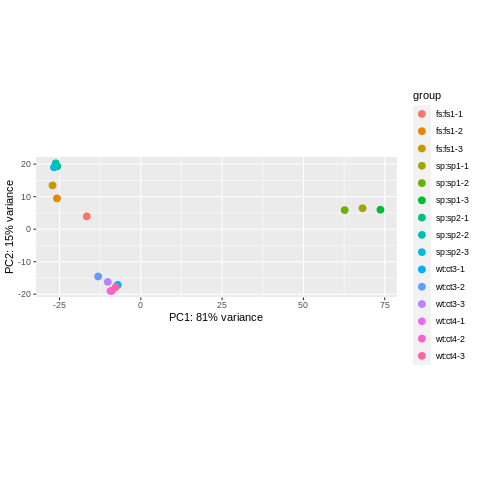

In [ ]:
%%R
plotPCA(vsd, intgroup=c("condition", "ID"))

In [ ]:
#heatmap
%%R
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$condition, vsd$type, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

In [ ]:
%%R -o res_df
#Generate results with DESeq
dds <- DESeq(ddsMat)
res_ <- results(dds, contrast=c("condition","fs","wt"))
# convert sorted result to a dataframe and export to python 
res_ = res_[order(res_$padj),]
res_df <- as.data.frame(res_)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [ ]:
%%R -o res_df
#Generate results with DESeq
dds <- DESeq(ddsMat)
res_ <- results(dds, contrast=c("condition","sp","wt"))
# convert sorted result to a dataframe and export to python 
res_ = res_[order(res_$padj),]
res_df <- as.data.frame(res_)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [ ]:
%%R -o res_df
#Generate results with DESeq
dds <- DESeq(ddsMat)
res_ <- results(dds, contrast=c("condition","fs","sp"))
# convert sorted result to a dataframe and export to python 
res_ = res_[order(res_$padj),]
res_df <- as.data.frame(res_)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [ ]:
%%R
head(res_df)

                 baseMean log2FoldChange     lfcSE      stat        pvalue
ENSG00000164600 2162.5870      -8.420431 0.3841185 -21.92144 1.622486e-106
ENSG00000104888 1534.3718      -4.217629 0.2181970 -19.32945  3.036406e-83
ENSG00000153266  350.4976      -5.836983 0.3125299 -18.67656  7.681337e-78
ENSG00000164330  807.5860       3.010923 0.1656503  18.17638  7.940003e-74
ENSG00000004399  800.5233      -3.467187 0.1981627 -17.49667  1.519012e-68
ENSG00000147488  390.4071      -4.469737 0.2594107 -17.23035  1.571930e-66
                         padj
ENSG00000164600 4.240205e-102
ENSG00000104888  3.967672e-79
ENSG00000153266  6.691469e-74
ENSG00000164330  5.187601e-70
ENSG00000004399  7.939569e-65
ENSG00000147488  6.846805e-63


In [ ]:
!pip install scanpy 

In [ ]:
!pip install pybiomart 

In [ ]:
# import annotation from the biomart database
import scanpy as sc
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id",'hgnc_symbol',"chromosome_name","start_position", "end_position"],
    ).set_index("ensembl_gene_id")

In [ ]:
# annotate the DE gene list
res_df_ann = res_df.merge(annot,left_index=True,right_index=True)
res_df_ann = res_df_ann.sort_values(by=['padj'])

res_df_ann.head(n=10)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,hgnc_symbol,chromosome_name,start_position,end_position
ENSG00000164600,2162.586988,-8.420431,0.384119,-21.921439,1.622486e-106,4.240205e-102,NEUROD6,7,31337465,31340726
ENSG00000104888,1534.371818,-4.217629,0.218197,-19.329449,3.036406e-83,3.967672e-79,SLC17A7,19,49429401,49442360
ENSG00000153266,350.497561,-5.836983,0.312530,-18.676559,7.681337e-78,6.691469e-74,FEZF2,3,62369681,62374324
ENSG00000164330,807.585980,3.010923,0.165650,18.176384,7.940003e-74,5.187601e-70,EBF1,5,158695916,159099916
ENSG00000004399,800.523301,-3.467187,0.198163,-17.496667,1.519012e-68,7.939569e-65,PLXND1,3,129555214,129606676
ENSG00000147488,390.407117,-4.469737,0.259411,-17.230352,1.571930e-66,6.846805e-63,ST18,8,52110839,52460959
ENSG00000170017,1319.618452,3.219704,0.201880,15.948587,2.914146e-57,1.087975e-53,ALCAM,3,105366909,105576900
ENSG00000136535,2411.788497,-5.631072,0.357470,-15.752561,6.595541e-56,2.154598e-52,TBR1,2,161416297,161425870
ENSG00000171532,913.015888,-6.795696,0.447745,-15.177618,4.975207e-52,1.444690e-48,NEUROD2,17,39603536,39609777
ENSG00000082397,1868.737611,-1.620138,0.107743,-15.037038,4.199250e-51,1.097432e-47,EPB41L3,18,5392381,5630700


In [ ]:
res_df_ann.to_excel("DESeq2_SPvsWT.xlsx",sheet_name="raw")